In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = pd.read_excel("rfv_analise.xlsx")


In [47]:
data = pd.DataFrame(data)

In [58]:
data.tail(5)

,Ano,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue
85797,2022,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,SANOFI PP,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85798,2022,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,TAKEDA CH,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85799,2022,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,TAKEDA PP,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85800,2022,CIRURGICA MONTEBELLO LTDA,PE,SMART,INSTITUCIONAL,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85801,2022,CIRURGICA MONTEBELLO LTDA,PE,SMART,SMART GENERICS,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0,0.0


In [73]:
data_features = data.loc[:, ['Ano', 'Rede', 'UF', "BU", "BU New", "Canal VD-VI-Hosp", "Trimestre", "Mês", 'Qtd Entregue']]

In [74]:
data_features

,Ano,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Trimestre,Mês,Qtd Entregue
0,2018,DROGASIL,BA,Adoçantes,CONSUMER HEALTH,VAREJO DIRETO,1 TRIMESTRE,FEVEREIRO,0.0
1,2018,DROGASIL,BA,Adoçantes,CONSUMER HEALTH,VAREJO DIRETO,1 TRIMESTRE,MARÇO,0.0
2,2018,DROGASIL,BA,Adoçantes,CONSUMER HEALTH,VAREJO DIRETO,2 TRIMESTRE,ABRIL,0.0
3,2018,DROGASIL,BA,Adoçantes,CONSUMER HEALTH,VAREJO DIRETO,2 TRIMESTRE,MAIO,64.0
4,2018,DROGASIL,BA,Adoçantes,CONSUMER HEALTH,VAREJO DIRETO,2 TRIMESTRE,JUNHO,352.0
...,...,...,...,...,...,...,...,...,...
85797,2022,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,SANOFI PP,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0
85798,2022,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,TAKEDA CH,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0
85799,2022,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,TAKEDA PP,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0
85800,2022,CIRURGICA MONTEBELLO LTDA,PE,SMART,INSTITUCIONAL,HOSPITALAR,4 TRIMESTRE,DEZEMBRO,0.0


In [75]:
data_target = data.loc[:, ['Entregue - Liq Abatimento']]

In [76]:
data_target

,Entregue - Liq Abatimento
0,0.00
1,0.00
2,0.00
3,5386.33
4,25947.19
...,...
85797,0.00
85798,0.00
85799,0.00
85800,0.00


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


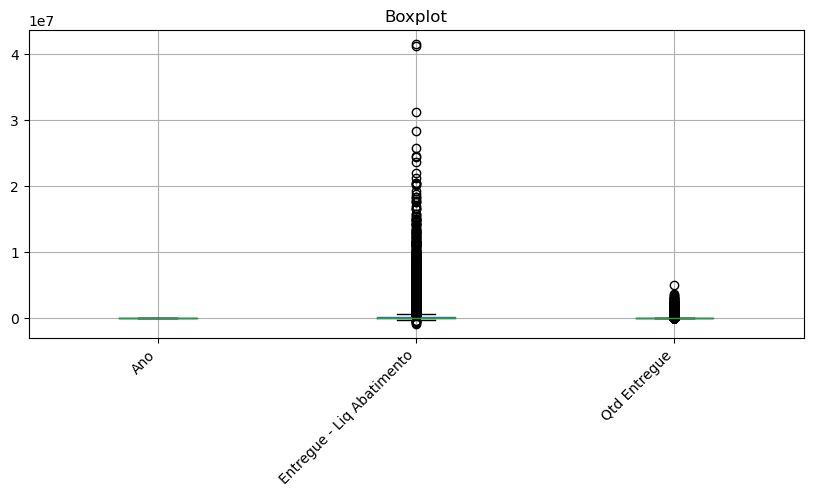

In [84]:
data.boxplot(figsize=(10, 4));
plt.title('Boxplot')
plt.xticks(rotation=45, ha='right');

In [85]:
data.isnull().sum()

Ano                          0
Rede                         0
UF                           0
BU                           0
BU New                       0
Canal VD-VI-Hosp             0
Trimestre                    0
Mês                          0
Entregue - Liq Abatimento    0
Qtd Entregue                 0
dtype: int64

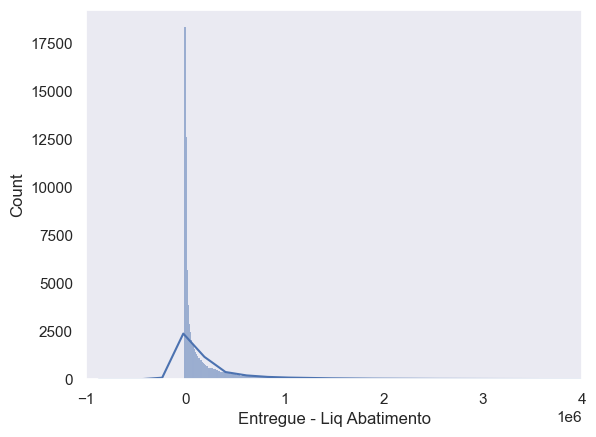

In [107]:
sns.histplot(data=data, x='Entregue - Liq Abatimento', kde=True )
plt.xlim([-1000000, 4000000])

plt.show()

In [92]:
data["Entregue - Liq Abatimento"].skew()

10.726830418083939

In [95]:
data["Log - Liq Abatimento"] = np.log10(data["Entregue - Liq Abatimento"])
data[["Log - Liq Abatimento", "Entregue - Liq Abatimento"]]

,Log - Liq Abatimento,Entregue - Liq Abatimento
0,-inf,0.00
1,-inf,0.00
2,-inf,0.00
3,3.731293,5386.33
4,4.414090,25947.19
...,...,...
85797,-inf,0.00
85798,-inf,0.00
85799,-inf,0.00
85800,-inf,0.00


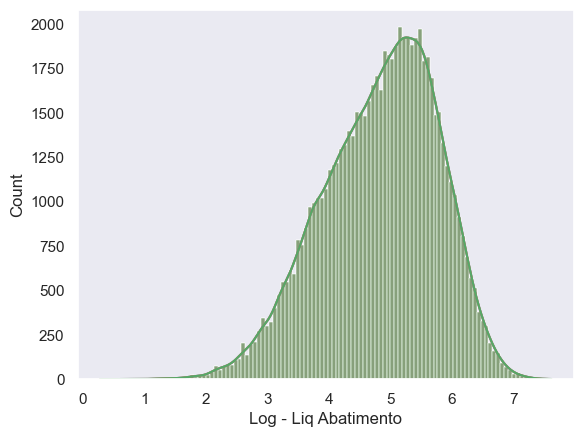

In [98]:
sns.histplot(data=data, x='Log - Liq Abatimento', kde=True )
plt.show()

In [114]:
data.isnull().sum()

Ano                            0
Rede                           0
UF                             0
BU                             0
BU New                         0
Canal VD-VI-Hosp               0
Trimestre                      0
Mês                            0
Entregue - Liq Abatimento      0
Qtd Entregue                   0
Log - Liq Abatimento         205
dtype: int64

In [116]:
correlacao = data.corr(method='spearman', numeric_only=True)
correlacao

,Ano,Entregue - Liq Abatimento,Qtd Entregue,Log - Liq Abatimento
Ano,1.000000,0.195049,0.152973,0.098734
Entregue - Liq Abatimento,0.195049,1.000000,0.936346,1.000000
Qtd Entregue,0.152973,0.936346,1.000000,0.888514
Log - Liq Abatimento,0.098734,1.000000,0.888514,1.000000


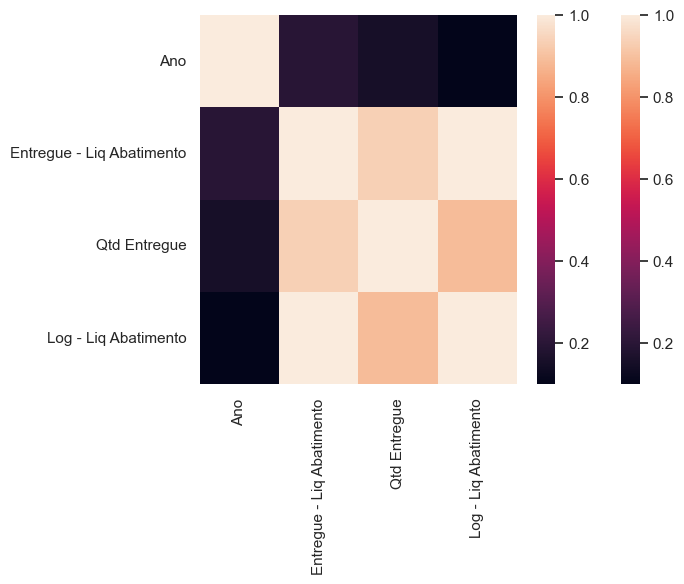

In [118]:
sns.heatmap(correlacao)
plt.show()

In [119]:
corr_abs = correlacao['Entregue - Liq Abatimento'].abs().sort_values(ascending=False)
corr_abs

Entregue - Liq Abatimento    1.000000
Log - Liq Abatimento         1.000000
Qtd Entregue                 0.936346
Ano                          0.195049
Name: Entregue - Liq Abatimento, dtype: float64

In [120]:
corr_abs[corr_abs>0.5]

Entregue - Liq Abatimento    1.000000
Log - Liq Abatimento         1.000000
Qtd Entregue                 0.936346
Name: Entregue - Liq Abatimento, dtype: float64

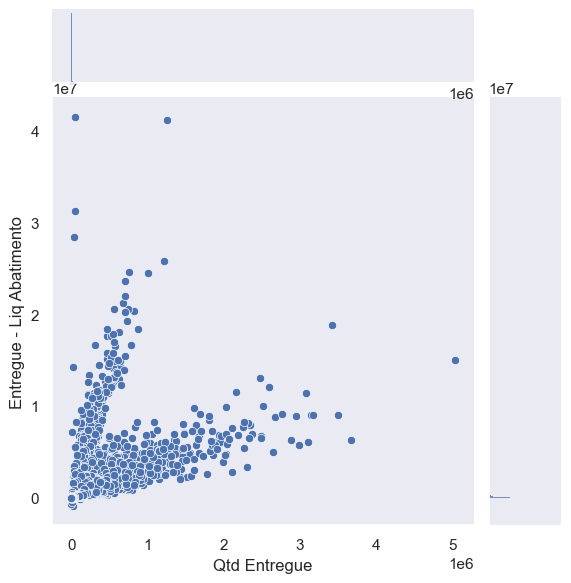

In [122]:
sns.jointplot(data=data, x='Qtd Entregue', y='Entregue - Liq Abatimento')
plt.show()

In [123]:
X = data[['Entregue - Liq Abatimento']]
y = data['Qtd Entregue']

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
model = LinearRegression()

In [126]:
model.fit(X_train, y_train)

LinearRegression()

In [127]:
vars(model)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Entregue - Liq Abatimento'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.06548167]),
 '_residues': 442561886840190.06,
 'rank_': 1,
 'singular_': array([2.25733404e+08]),
 'intercept_': 8859.01553438662}

In [128]:
print(f'Coeficiente linear: {model.intercept_}')

Coeficiente linear: 8859.01553438662


In [129]:
print(f'Coeficiente angular: {model.coef_[0]}')

Coeficiente angular: 0.06548167146722134


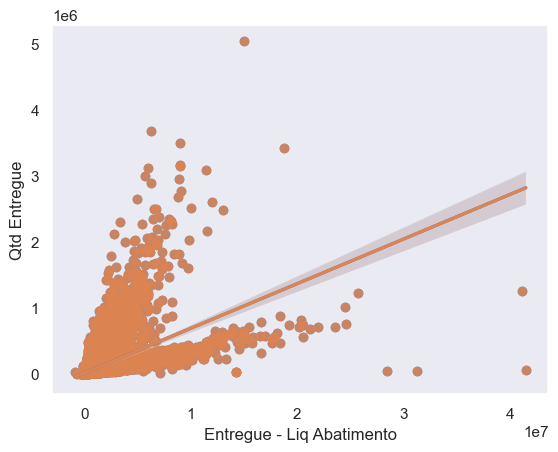

In [132]:
sns.regplot(data=data, x='Entregue - Liq Abatimento', y='Qtd Entregue')
plt.show()

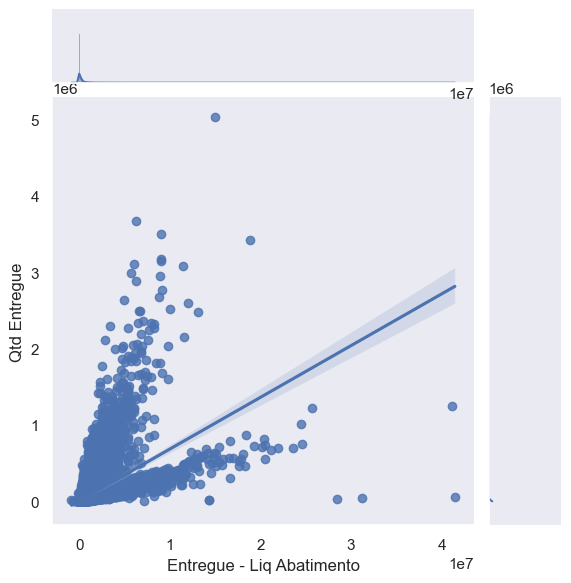

In [136]:
sns.jointplot(data=data, x='Entregue - Liq Abatimento', y='Qtd Entregue', kind='reg')
plt.show()

In [182]:
df_outliers = data[(data['Entregue - Liq Abatimento'] > 10000000) & (data['Qtd Entregue'] > 1000000)]
df = data[(data['Entregue - Liq Abatimento'] < 10000000) & (data['Qtd Entregue'] < 1000000)]

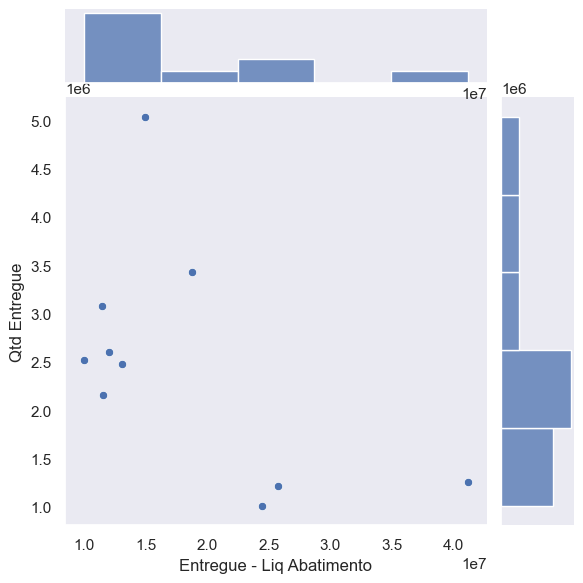

In [181]:
sns.jointplot(data=df_outliers, x='Entregue - Liq Abatimento', y='Qtd Entregue')
plt.show()

In [185]:
df_outliers

,Ano,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,Log - Liq Abatimento
3680,2021,DROGASIL,SP,MARCAS,PRESCRIPTION PRODUCTS,VAREJO DIRETO,4 TRIMESTRE,NOVEMBRO,41143708.75,1251871.0,7.614303
16104,2018,DROG SAO PAULO/PACHECO SA,SP,MARCAS,PRESCRIPTION PRODUCTS,VAREJO DIRETO,2 TRIMESTRE,JUNHO,24461420.30,1009419.0,7.388482
25308,2018,D CENTER DISTRIBUIDORA LTDA,GO,MARCAS,PRESCRIPTION PRODUCTS,VAREJO INDIRETO,3 TRIMESTRE,SETEMBRO,25738416.06,1218457.0,7.410582
30120,2022,ORIENTE,MG,GENÉRICOS,SMART GENERICS,VAREJO INDIRETO,2 TRIMESTRE,JUNHO,11443323.01,3080689.0,7.058552
30126,2022,ORIENTE,MG,GENÉRICOS,SMART GENERICS,VAREJO INDIRETO,4 TRIMESTRE,DEZEMBRO,18795990.07,3424190.0,7.274065
30215,2021,ORIENTE,MG,SMART,SMART GENERICS,VAREJO INDIRETO,3 TRIMESTRE,SETEMBRO,12022776.14,2599492.0,7.080005
30224,2022,ORIENTE,MG,SMART,SMART GENERICS,VAREJO INDIRETO,2 TRIMESTRE,JUNHO,11520892.45,2156672.0,7.061486
30230,2022,ORIENTE,MG,SMART,SMART GENERICS,VAREJO INDIRETO,4 TRIMESTRE,DEZEMBRO,13069126.51,2478137.0,7.116247
36238,2021,DISLAB GO COMERCIAL FARMACEUTICA,GO,SMART,SMART GENERICS,VAREJO INDIRETO,3 TRIMESTRE,SETEMBRO,14980394.38,5033553.0,7.175523
36241,2021,DISLAB GO COMERCIAL FARMACEUTICA,GO,SMART,SMART GENERICS,VAREJO INDIRETO,4 TRIMESTRE,DEZEMBRO,10017926.22,2515936.0,7.000778


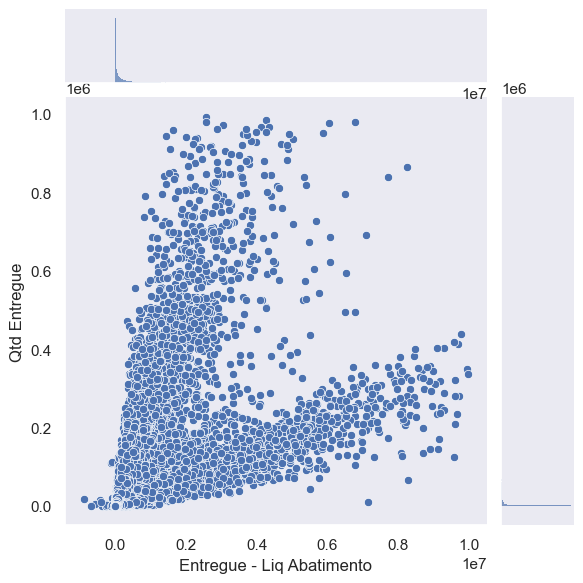

In [184]:
sns.jointplot(data=df, x='Entregue - Liq Abatimento', y='Qtd Entregue')
plt.show()

In [201]:
df_ano = data.groupby(["Ano", "Rede", "UF"]).sum(["Entregue - Liq Abatimento", "Qtd Entregue"])

In [202]:
df_ano

Entregue - Liq Abatimento   
Ano  Rede                                UF                              
2018 A A AFONSO E CIA LTDA               SP                    6134.40  \
     A ANGELONI E CIA LTDA               SC                  340467.52   
     A FEIRITA DISTRIBUIDORA DE PRODUTOS BA                  747044.68   
     A G KIENEN E CIA LTDA               PR                   75984.92   
     A NOSSA DROGA  DE CAXIAS            RJ                 3907061.10   
...                                                                ...   
2022 WAL MART                            PE                 1599772.65   
                                         PR                  781650.54   
                                         RS                 1765448.13   
                                         SC                  309998.29   
                                         SP                 3776564.60   

                                             Qtd Entregue   
Ano  Rede                                UF                 
2018 A A AFONSO E CIA LTDA               SP         240.0  \
     A ANGELONI E CIA LTDA               SC        6272.0   
     A FEIRITA DISTRIBUIDORA DE PRODUTOS BA       19308.0   
     A G KIENEN E CIA LTDA               PR       14622.0   
     A NOSSA DROGA  DE CAXIAS            RJ      129684.0   
...                                                   ...   
2022 WAL MART                            PE       46659.0   
                                         PR       38022.0   
                                         RS       61540.0   
                                         SC        5710.0   
                                         SP      102053.0   

                                             Log - Liq Abatimento  
Ano  Rede                                UF                        
2018 A A AFONSO E CIA LTDA               SP              6.973484  
     A ANGELONI E CIA LTDA               SC                   NaN  
     A FEIRITA DISTRIBUIDORA DE PRODUTOS BA                   NaN  
     A G KIENEN E CIA LTDA               PR                   NaN  
     A NOSSA DROGA  DE CAXIAS            RJ                   NaN  
...                                                           ...  
2022 WAL MART                            PE                   NaN  
                                         PR                   NaN  
                                         RS                   NaN  
                                         SC             37.998271  
                                         SP                   NaN  

[2836 rows x 3 columns]

In [204]:
df_ano.loc[df_ano["Entregue - Liq Abatimento"].idxmax()]

Entregue - Liq Abatimento    5.687882e+08
Qtd Entregue                 3.091431e+07
Log - Liq Abatimento                  NaN
Name: (2022, DROGASIL, SP), dtype: float64

In [210]:
top_10_compras = df_ano.nlargest(10, 'Entregue - Liq Abatimento')

In [211]:
top_10_compras

Entregue - Liq Abatimento  Qtd Entregue   
Ano  Rede                        UF                                            
2022 DROGASIL                    SP               5.687882e+08    30914314.0  \
2021 DROGASIL                    SP               4.235932e+08    24659665.0   
2022 PROFARMA                    RJ               3.027080e+08    12501774.0   
2019 DROGASIL                    SP               2.928360e+08    21036662.0   
2020 DROGASIL                    SP               2.832494e+08    19517454.0   
2022 REDE SANTA CRUZ             SP               2.788552e+08    15997723.0   
     DROG SAO PAULO/PACHECO SA   GO               2.005569e+08    12694970.0   
     PANPHARMA DIST DE MED LTDA  SP               1.989501e+08     7390685.0   
     EMPREENDIMENTOS PAGUE MENOS CE               1.970885e+08    11826843.0   
2021 REDE SANTA CRUZ             SP               1.872246e+08     8412442.0   

                                     Log - Liq Abatimento  
Ano  Rede                        UF                        
2022 DROGASIL                    SP                   NaN  
2021 DROGASIL                    SP                   NaN  
2022 PROFARMA                    RJ                   NaN  
2019 DROGASIL                    SP                   NaN  
2020 DROGASIL                    SP                   NaN  
2022 REDE SANTA CRUZ             SP                   NaN  
     DROG SAO PAULO/PACHECO SA   GO                   NaN  
     PANPHARMA DIST DE MED LTDA  SP                   NaN  
     EMPREENDIMENTOS PAGUE MENOS CE                   NaN  
2021 REDE SANTA CRUZ             SP                   NaN

In [208]:
df_ano.loc[df_ano["Qtd Entregue"].idxmax()]

Entregue - Liq Abatimento    5.687882e+08
Qtd Entregue                 3.091431e+07
Log - Liq Abatimento                  NaN
Name: (2022, DROGASIL, SP), dtype: float64

In [213]:
top_10_qtd = df_ano.nlargest(10, 'Qtd Entregue')
top_10_qtd

Entregue - Liq Abatimento   
Ano  Rede                             UF                              
2022 DROGASIL                         SP               5.687882e+08  \
     ORIENTE                          MG               1.286010e+08   
2021 ORIENTE                          MG               9.982738e+07   
     DROGASIL                         SP               4.235932e+08   
     DISLAB GO COMERCIAL FARMACEUTICA GO               7.152193e+07   
2020 DISLAB GO COMERCIAL FARMACEUTICA GO               5.584703e+07   
2019 DROGASIL                         SP               2.928360e+08   
2021 MEDICAMENTAL DISTR LTDA          GO               5.715798e+07   
2020 ORIENTE                          MG               7.396413e+07   
     DROGASIL                         SP               2.832494e+08   

                                          Qtd Entregue  Log - Liq Abatimento  
Ano  Rede                             UF                                      
2022 DROGASIL                         SP    30914314.0                   NaN  
     ORIENTE                          MG    27910369.0                   NaN  
2021 ORIENTE                          MG    25591253.0                   NaN  
     DROGASIL                         SP    24659665.0                   NaN  
     DISLAB GO COMERCIAL FARMACEUTICA GO    23308028.0                   NaN  
2020 DISLAB GO COMERCIAL FARMACEUTICA GO    21720292.0                   NaN  
2019 DROGASIL                         SP    21036662.0                   NaN  
2021 MEDICAMENTAL DISTR LTDA          GO    20855992.0                   NaN  
2020 ORIENTE                          MG    19765321.0                   NaN  
     DROGASIL                         SP    19517454.0                   NaN

In [215]:
qtd_valor_max = df.loc[(df['Entregue - Liq Abatimento'] * df['Qtd Entregue']).idxmax()]
qtd_valor_max

Ano                                                    2018
Rede                         EMEFARMA DISTR DE PRODUTOS FAR
UF                                                       RJ
BU                                                    SMART
BU New                                       SMART GENERICS
Canal VD-VI-Hosp                            VAREJO INDIRETO
Trimestre                                       4 TRIMESTRE
Mês                                                DEZEMBRO
Entregue - Liq Abatimento                        8258449.28
Qtd Entregue                                       865724.0
Log - Liq Abatimento                               6.916899
Name: 34946, dtype: object

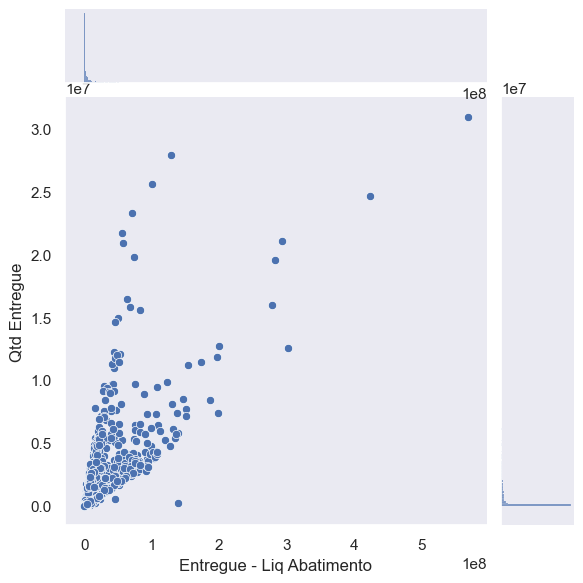

In [203]:
sns.jointplot(data=df_ano, x='Entregue - Liq Abatimento', y='Qtd Entregue')
plt.show()